In [28]:
import matplotlib.pyplot as plt
import numpy as np
import signac

from cmeutils.sampling import is_equilibrated

In [29]:
project = signac.get_project()

In [30]:
# We don't want to include the shrinking portion of the trajectory's data
shrink_cut = 5000

for job in project.find_jobs():
    if job.doc.runs == 0: # Don't try to test for jobs that haven't finished their initial run
        continue
    log = np.genfromtxt(job.fn(f"log{job.doc.runs - 1}.txt"), names=True)
    pe = log["mdcomputeThermodynamicQuantitiespotential_energy"]
    # equil: bool (True or False), t0: int (starting data point that you can sample from), neff: number of data points in equilibrated region
    equil, t0, g, neff = is_equilibrated(data=pe[shrink_cut:], threshold_neff=200) 
    if equil:
        # Update the job's document file
        # We want job.doc to be True to signal the "production" signac operation in project.py the next time we submit this job
        job.doc.equilibrated = True
        job.doc.t0 = t0 + shrink_cut
        job.doc.neff = neff
        job.doc.equil_run = job.doc.runs - 1
    else:
        # If it's not equilibrated, job.doc.equilibrated stays false, and the "run-longer" operation in project.py will run next time we submit this job
        print(job.id)
        print(t0, g, neff)
        print()

/home/chrisjones4/miniconda3/envs/entanglements/lib/python3.11/site-packages/synced_collections/numpy_utils.py:46: NumpyConversionWarning: Any numpy types provided will be transparently converted to the closest base Python equivalents.
  warnings.warn(NUMPY_CONVERSION_WARNING, NumpyConversionWarning)


/tmp/ipykernel_554520/1706735636.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(pe[job.doc.t0:] / job.doc.n_particles, label=job.sp.chains)


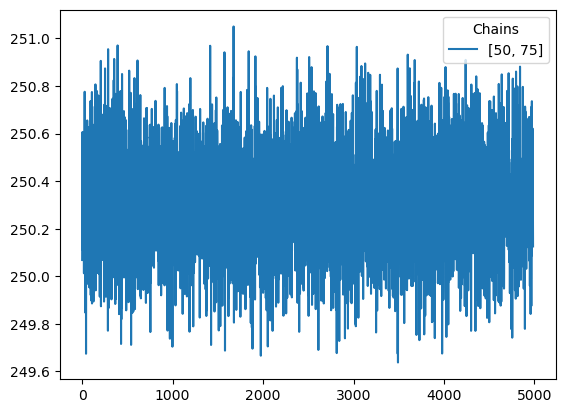

In [37]:
# Plot the PE for the equilibrated jobs as an extra sanity check. Do they look equilibrated?
for job in project.find_jobs(filter={"doc.equilibrated": True}):
    log = np.genfromtxt(job.fn(f"log{job.doc.equil_run}.txt"), names=True)
    pe = log["mdcomputeThermodynamicQuantitiespotential_energy"]
    plt.plot(pe[job.doc.t0:] / job.doc.n_particles, label=job.sp.chains)

plt.legend(title="Chains")

In [35]:
job.doc

{'equilibrated': True, 'sampled': False, 'runs': 1, 'num_mols': 50, 'lengths': 75, 'n_particles': 3750, 'ref_length': 0.3438, 'ref_length_units': 'nm', 'ref_energy': 1.065, 'ref_energy_units': 'kJ/mol', 'ref_mass': 32.06, 'ref_mass_units': 'amu', 'system_mass_g': 6.736695146389105e-19, 'tau_kT': 0.5, 'real_time_step': 9.431544796025548, 'real_time_units': 'fs', 'target_box': [7.991426716196505e-07, 7.991426716196505e-07, 7.991426716196505e-07], 't0': 5016, 'neff': 4504.83740234375, 'equil_run': 0}